<a href="https://colab.research.google.com/github/Tauseef-09/TED_Talk_Views_Prediction/blob/main/TED_Talk_Views_Prediction_team_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Ted Talks Views Prediction**
---

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.
Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates. The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

---

---
# **GOAL**

*  The main goal is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.
---

# Tabel of content 


* __Step 1: Importing the Necessary Libraries__
    
* __Step 2: Data Loading__
    
* __Step 3: Basic observation of our Dataset__
    
* __Step 4: Imputing the Null_values__
   
* __Step 5: Exploring each feature__

>>* __datetime type ['recorded_date', 'published_date']__
>>* __speaker_1__
>>* __event__
>>* __available_lang__
>>* __occupations__
>>* __topics__
>>* __native_lang__
>>* __title__
   
* __Step 6: Outlier Treatment__
   
* __Step 7: Mean Encoding__
   
* __Step 8: One-Hot-Encoding__

* __Step 9: Feature Selction__

* __Step 10: Dealing with Multicollinearity__

* __Step 11: Models Implementation__

>>* __Linear Regression__
>>* __Lasso Regularization__
>>* __Ridge Regularization__
>>* __Elastic Net Regularization__
>>* __Decision Tree Regression__
>>* __Random Forest Regression__
>>* __Ada Boost Regression__
>>* __Gradient Boost Regression__
>>* __XG Boost Regression__


* __Step 12: Conclusion__


---




#Features information:



* **talk_id**: Talk identification number provided by TED

* **title**: Title of the talk

* **speaker_1**: First speaker in TED's speaker list

* **all_speakers**: Speakers in the talk

* **occupations**: Occupations of the speakers

* **about_speakers**: Blurb about each speaker

* **recorded_date**: Date the talk was recorded

* **published_date**: Date the talk was published to TED.com

* **event**: Event or medium in which the talk was given

* **native_lang**: Language the talk was given in

* **available_lang**: All available languages (lang_code) for a talk

* **comments**: Count of comments

* **duration**: Duration in seconds

* **topics**: Related tags or topics for the talk

* **related_talks**: Related talks (key='talk_id',value='title')

* **url**: URL of the talk

* **description**: Description of the talk

* **transcript**: Full transcript of the talk

###**Target Variable** :

* **views**: Count of views



---
## Importing the Necessary Libraries
---

In [1]:

# importing data manuplation and data visualization libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# importing necessary classes from sci-kit learn library for imputing null values.

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# importing WordCloud class from wordcloud class for Data Analysis.

from wordcloud import WordCloud,ImageColorGenerator

# importing required classes for model selection.

from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# importing various machine learning models.

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# importing classes of sci-kit learn for checking multicollinearity and feature selection.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing model evaluation metrics.

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# importing warnings library to avoid unnecessary warnings.

import warnings
warnings.filterwarnings('ignore')


---
# Data Loading
---

In [2]:
# Mounting drive inorder to get the data set

from google.colab import drive
drive.mount('/content/mount')


Drive already mounted at /content/mount; to attempt to forcibly remount, call drive.mount("/content/mount", force_remount=True).


In [3]:
# Reading the required data set from drive and storing it in a variable

Ted_df = pd.read_csv('/content/mount/MyDrive/mount_data/data_ted_talks.csv')


In [4]:
# Copying the data into another varible so that any changes we make wont change the data present in our original data frame.

Ted_data = Ted_df.copy()


---
# Basic Observation of our Data Set 
---

In [5]:
# Trying to know about the shape of our data set.

print(f'The number of observations in our Data set =', Ted_data.shape[0])
print(f'The number of features in our Data set =', Ted_data.shape[1])


The number of observations in our Data set = 4005
The number of features in our Data set = 19


In [6]:
# Getting a glance of what kinda data present in our data set.

Ted_data.sample(5) 


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
3611,46598,What I learned about freedom after escaping No...,Yeonmi Park,{0: 'Yeonmi Park'},{0: ['human rights activist']},{0: 'North Korean defector Yeonmi Park is beco...,2875148,2019-04-15,2019-08-30,TED2019,en,"['ar', 'el', 'en', 'es', 'fa', 'fr', 'gu', 'he...",32.0,648,"['human rights', 'humanity', 'social change', ...","{1694: 'My escape from North Korea', 1771: 'Th...",https://www.ted.com/talks/yeonmi_park_what_i_l...,"""North Korea is unimaginable,"" says human righ...",I was born in 1993 in the northern part of Nor...
2349,2709,Beautiful new words to describe obscure emotions,John Koenig,{0: 'John Koenig'},{0: ['writer']},{0: 'John Koenig is writing an original dictio...,1830772,2016-02-06,2017-03-10,TEDxBerkeley,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",101.0,448,"['beauty', 'innovation', 'humanity', 'communic...","{2158: 'Go ahead, make up new words!', 2022: '...",https://www.ted.com/talks/john_koenig_beautifu...,John Koenig loves finding words that express o...,Today I want to talk about the meaning of word...
810,1056,The economic injustice of plastic,Van Jones,{0: 'Van Jones'},{0: ['social justice and green energy activist']},{0: 'Van Jones sees a clear link between socia...,639972,2010-11-14,2011-01-19,TEDxGreatPacificGarbagePatch,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'et', 'fr...",361.0,769,"['TEDx', 'business', 'communication', 'global ...","{53: 'Greening the ghetto', 1239: 'We can recy...",https://www.ted.com/talks/van_jones_the_econom...,"When we throw away our plastic trash, where do...","I am honored to be here, and I'm honored to ta..."
672,880,Sweat the small stuff,Rory Sutherland,{0: 'Rory Sutherland'},{0: ['advertising guru']},{0: 'Rory Sutherland stands at the center of a...,1241136,2010-04-19,2010-06-09,TEDSalon London 2010,en,"['ar', 'bg', 'cs', 'da', 'de', 'el', 'en', 'es...",499.0,757,"['creativity', 'design', 'economics', 'enginee...","{658: 'Life lessons from an ad man', 803: ""Let...",https://www.ted.com/talks/rory_sutherland_swea...,It may seem that big problems require big solu...,Those of you who may remember me from TEDGloba...
58,48,Everyday inventions,Saul Griffith,{0: 'Saul Griffith'},{0: ['inventor']},{0: 'Inventor Saul Griffith looks for elegant ...,583922,2006-02-23,2007-02-19,TED2006,en,"['ar', 'bg', 'de', 'en', 'es', 'fr', 'he', 'hr...",28.0,869,"['MacArthur grant', 'collaboration', 'design',...","{90: 'Unleash your creativity in a Fab Lab', 2...",https://www.ted.com/talks/saul_griffith_everyd...,Inventor and MacArthur fellow Saul Griffith sh...,"So anyway, who am I? I usually say to people, ..."


In [7]:

Ted_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [8]:

x = round(100*(Ted_data.isnull().sum()/len(Ted_data)), 2).sort_values(ascending=False)
round(100*(Ted_data.isnull().sum()/len(Ted_data)), 2).sort_values(ascending=False)


comments          16.35
occupations       13.03
about_speakers    12.56
all_speakers       0.10
recorded_date      0.02
talk_id            0.00
description        0.00
url                0.00
related_talks      0.00
topics             0.00
duration           0.00
event              0.00
available_lang     0.00
native_lang        0.00
title              0.00
published_date     0.00
views              0.00
speaker_1          0.00
transcript         0.00
dtype: float64

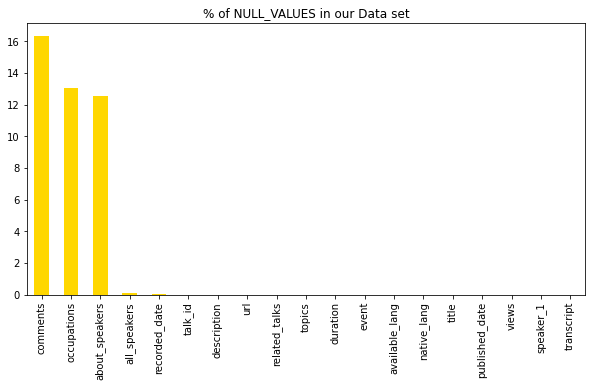

In [9]:

p_values= pd.Series(x)
p_values.plot(kind='bar',color='gold',figsize=(10,5))
plt.title('% of NULL_VALUES in our Data set')
plt.show()


* We can clearly see that null values are present in 'all_speakers', 'occupations', 'about_speakers', 'recorded_date' and 'comments' columns.
* Most of the features are of 'object' data type.

In [10]:
# Dropping unnecessary columns 

Ted_data.drop(columns = ['about_speakers', 'related_talks', 'url', 'description', 'transcript'], inplace = True)


---
## Null Values Imputation
---

In [11]:
# the columns to be treated of null values are stored in a variable.

null_val_col = Ted_data[['all_speakers', 'occupations', 'comments']]

# Different types of imputations needed for the respective columnns are coded.

imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='constant', fill_value = '')
imputer3 = SimpleImputer(strategy='constant', fill_value = str({0:['Other']}))

# Creating Column Transformer Variable and assigning what kinda imputations to be applied on what columns.

trf = ColumnTransformer([
    ('imputing_all_speakers',imputer2,['all_speakers']),
    ('imputing_occupations',imputer3,['occupations']),
    ('imputing_comments',imputer1,['comments'])]
,remainder='passthrough')


In [12]:
# Fitting (or) Imputing the null values. 

data_transformed = trf.fit_transform(null_val_col)
data_transformed


array([["{0: 'Al Gore'}", "{0: ['climate advocate']}", 272.0],
       ["{0: 'Hans Rosling'}",
        "{0: ['global health expert; data visionary']}", 628.0],
       ["{0: 'David Pogue'}", "{0: ['technology columnist']}", 124.0],
       ...,
       ["{0: 'Dick M. Carpenter II'}", "{0: ['law researcher']}", 9.0],
       ["{0: 'Daina Ramey Berry'}", "{0: ['Other']}", 161.99701492537312],
       ["{0: 'Cella Wright'}", "{0: ['Other']}", 161.99701492537312]],
      dtype=object)

In [13]:
# Converting the array of null imputed columns into a Data Frame.

data_t_transformed = pd.DataFrame(data_transformed,columns=['all_speakers', 'occupations', 'comments'])

# Dropping the original columns which are not treated of null values.

Ted_data.drop(columns = ['all_speakers', 'occupations', 'comments'], inplace = True)

# Concatinating the columns.

Ted_non_null_df = pd.concat([Ted_data, data_t_transformed], axis=1)


In [14]:
# As there is only one null value in 'recorded_date' column we can simply drop it.

Ted_non_null_df = Ted_non_null_df.dropna()
Ted_non_null_df.isnull().sum()


talk_id           0
title             0
speaker_1         0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
duration          0
topics            0
all_speakers      0
occupations       0
comments          0
dtype: int64

In [15]:
# comments column has changed to object type lets make it to int again

Ted_non_null_df['comments'] = Ted_non_null_df['comments'].astype('int64')
Ted_non_null_df.describe().apply(lambda x: x.apply('{0:.2f}'.format)).T


,count,mean,std,min,25%,50%,75%,max
talk_id,4004.00,12421.50,17435.76,1.00,1251.75,2332.50,23774.00,62794.00
views,4004.00,2148223.29,3451629.07,0.00,881760.50,1375593.50,2133174.50,65051954.00
duration,4004.00,723.93,361.79,60.00,392.75,738.00,973.25,3922.00
comments,4004.00,161.87,245.89,0.00,46.00,119.00,162.00,6449.00


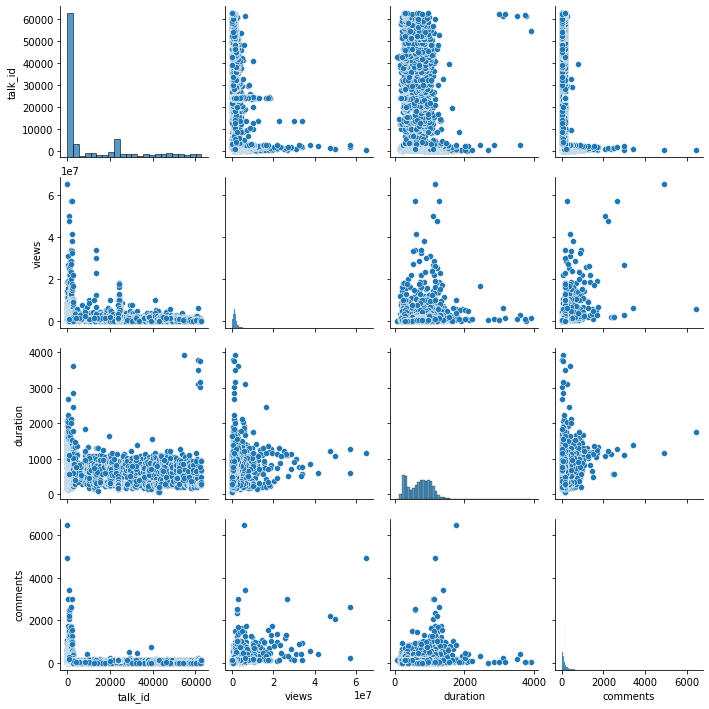

In [16]:

sns.pairplot(Ted_non_null_df)
plt.show()


* Here we can observe that there are outliers in every bivariate analysis of  numerical columns 

---
# Exploring Features of our Data Set
---

### Exploring the columns of type : 'datetime'.
---

In [17]:
# Finding the no of days it took for a recorded Ted talk to get published.

from datetime import datetime

Ted_date_col = Ted_non_null_df[['recorded_date', 'published_date']]

def days_num(rd, pd):
    
    '''This function gives the difference between the two given dates after parsing them into date time type'''
    date_format = "%Y-%m-%d"
    a = datetime.strptime(rd , date_format)
    b = datetime.strptime(pd , date_format)
    delta = b - a
    return delta.days

Ted_non_null_df['No_of_days_to_release'] = Ted_date_col.apply(lambda x: days_num(x['recorded_date'], x['published_date']),axis=1)


In [18]:
Ted_non_null_df.sample(3)

,talk_id,title,speaker_1,views,recorded_date,published_date,event,native_lang,available_lang,duration,topics,all_speakers,occupations,comments,No_of_days_to_release
520,653,Optical illusions show how we see,Beau Lotto,7214463,2009-07-23,2009-10-08,TEDGlobal 2009,en,"['ar', 'bg', 'ca', 'cs', 'da', 'de', 'el', 'en...",990,"['art', 'brain', 'consciousness', 'mind', 'psy...",{0: 'Beau Lotto'},{0: ['neuroscientist']},251,77
3165,31745,What your breath could reveal about your health,Julian Burschka,2129890,2018-11-26,2019-02-07,"TED@Merck KGaA, Darmstadt, Germany",en,"['ar', 'bg', 'en', 'es', 'fa', 'fr', 'gl', 'he...",809,"['science', 'health', 'medical research', 'ill...",{0: 'Julian Burschka'},{0: ['technologist']},12,73
3197,24167,"How do dogs ""see"" with their noses?",Alexandra Horowitz,1804294,2015-02-02,2019-02-15,TED-Ed,en,"['ar', 'bg', 'de', 'en', 'es', 'fa', 'fr', 'he...",252,"['anthropology', 'consciousness', 'psychology'...",{0: 'Alexandra Horowitz'},{0: ['Other']},161,1474


In [19]:
Ted_non_null_df.describe().apply(lambda x: x.apply('{0:.2f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
talk_id,4004.00,12421.50,17435.76,1.00,1251.75,2332.50,23774.00,62794.00
views,4004.00,2148223.29,3451629.07,0.00,881760.50,1375593.50,2133174.50,65051954.00
duration,4004.00,723.93,361.79,60.00,392.75,738.00,973.25,3922.00
comments,4004.00,161.87,245.89,0.00,46.00,119.00,162.00,6449.00
No_of_days_to_release,4004.00,307.22,582.36,-578.00,42.00,104.00,229.00,8804.00


* Here the minimum value of 'No_of_days_to_release' can't be negative as the published date will be always ahead of recorded date. So, we have to deal it.

In [20]:
# Function Which makes the negative values in 'No_of_days_to_release' column to '0'.

def changing_no_of_days(a):
    
    '''This function converts negitive values to 0 and returns back the same value if it is positive'''
    if a < 0 :
        return 0
    else:
        return a
    
Ted_non_null_df['No_of_days_to_release'] = Ted_non_null_df.apply(lambda x: changing_no_of_days(x['No_of_days_to_release']),axis=1)


In [21]:

Ted_non_null_df.describe().apply(lambda x: x.apply('{0:.2f}'.format)).T


,count,mean,std,min,25%,50%,75%,max
talk_id,4004.00,12421.50,17435.76,1.00,1251.75,2332.50,23774.00,62794.00
views,4004.00,2148223.29,3451629.07,0.00,881760.50,1375593.50,2133174.50,65051954.00
duration,4004.00,723.93,361.79,60.00,392.75,738.00,973.25,3922.00
comments,4004.00,161.87,245.89,0.00,46.00,119.00,162.00,6449.00
No_of_days_to_release,4004.00,307.94,581.74,0.00,42.00,104.00,229.00,8804.00


In [22]:
# Converting the column from str to datetime.

Ted_non_null_df['published_date'] = pd.to_datetime(Ted_non_null_df['published_date'])

# Extracting the details in our date column.

Ted_non_null_df['published_date_year'] = Ted_non_null_df['published_date'].dt.year
Ted_non_null_df['published_date_month'] = Ted_non_null_df['published_date'].dt.month_name()
Ted_non_null_df['published_date_month_num'] = Ted_non_null_df['published_date'].dt.month
Ted_non_null_df['published_date_day'] = Ted_non_null_df['published_date'].dt.day
Ted_non_null_df['published_date_day_name'] = Ted_non_null_df['published_date'].dt.day_name()


In [23]:
Ted_non_null_df.sample(3)

,talk_id,title,speaker_1,views,recorded_date,published_date,event,native_lang,available_lang,duration,topics,all_speakers,occupations,comments,No_of_days_to_release,published_date_year,published_date_month,published_date_month_num,published_date_day,published_date_day_name
1282,1563,The mysterious workings of the adolescent brain,Sarah-Jayne Blakemore,3108732,2012-06-25,2012-09-17,TEDGlobal 2012,en,"['ar', 'bg', 'ca', 'cs', 'de', 'el', 'en', 'es...",866,"['brain', 'cognitive science', 'neuroscience',...",{0: 'Sarah-Jayne Blakemore'},{0: ['cognitive neuroscientist']},172,84,2012,September,9,17,Monday
1822,2143,To the South Pole and back — the hardest 105 d...,Ben Saunders,1149048,2014-03-20,2014-12-02,TED2014,en,"['ar', 'el', 'en', 'es', 'fa', 'fr', 'he', 'hu...",1024,"['adventure', 'exploration', 'extreme sports',...",{0: 'Ben Saunders'},{0: ['polar explorer']},44,257,2014,December,12,2,Tuesday
2205,2545,What a planet needs to sustain life,Dave Brain,1891720,2015-09-19,2016-08-12,TEDxBoulder,en,"['ar', 'bg', 'bn', 'cs', 'de', 'el', 'en', 'es...",822,"['cosmos', 'discovery', 'extraterrestrial life...",{0: 'Dave Brain'},{0: ['planetary scientist']},191,328,2016,August,8,12,Friday


In [24]:
# Creating a column named 'published_date_day_num' with day names of a week.

day_name = {'Monday':0 , 'Tuesday':1 , 'Wednesday':2 , 'Thursday':3 , 'Friday':4 , 'Saturday':5 , 'Sunday':6}
Ted_non_null_df['published_date_day_num'] = Ted_non_null_df['published_date_day_name'].map(day_name)
Ted_non_null_df.head(3)


,talk_id,title,speaker_1,views,recorded_date,published_date,event,native_lang,available_lang,duration,...,all_speakers,occupations,comments,No_of_days_to_release,published_date_year,published_date_month,published_date_month_num,published_date_day,published_date_day_name,published_date_day_num
0,1,Averting the climate crisis,Al Gore,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",977,...,{0: 'Al Gore'},{0: ['climate advocate']},272,122,2006,June,6,27,Tuesday,1
1,92,The best stats you've ever seen,Hans Rosling,14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",1190,...,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},628,125,2006,June,6,27,Tuesday,1
2,7,Simplicity sells,David Pogue,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",1286,...,{0: 'David Pogue'},{0: ['technology columnist']},124,123,2006,June,6,27,Tuesday,1


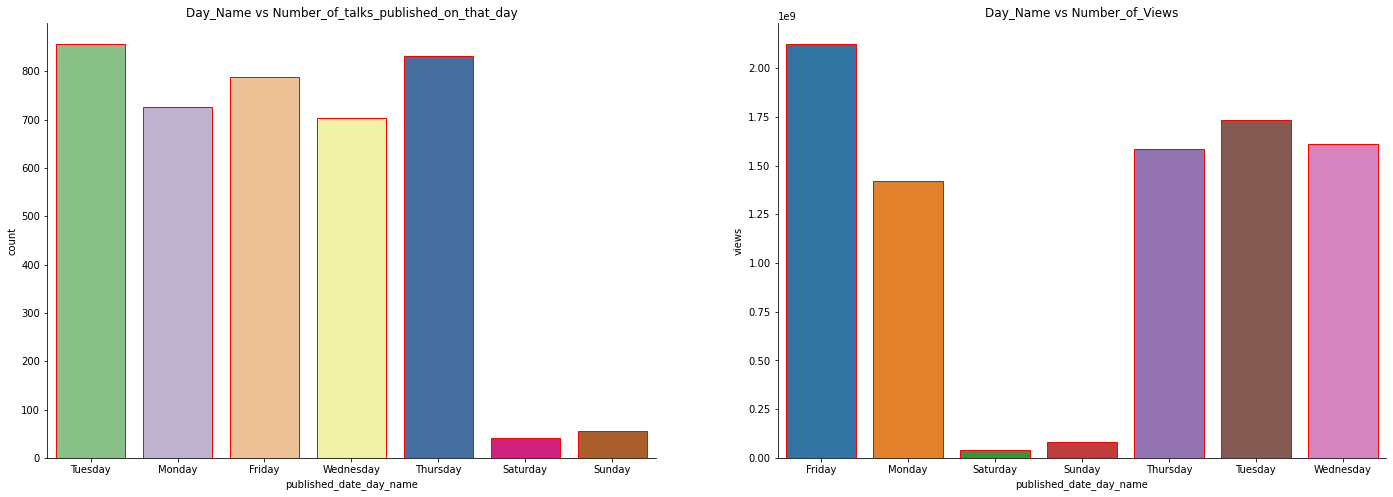

In [25]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))
ax = axes.flatten()

sns.countplot(data = Ted_non_null_df ,x='published_date_day_name',palette ='Accent', edgecolor = 'r', ax=ax[0])
ax[0].set_title('Day_Name vs Number_of_talks_published_on_that_day')

total_views = Ted_non_null_df.groupby('published_date_day_name')['views'].sum().reset_index()
sns.barplot(x='published_date_day_name',y='views' ,data =total_views, edgecolor = 'r', ax=ax[1])
ax[1].set_title('Day_Name vs Number_of_Views')

sns.despine(fig)


* From first bar graph we can clearly see that most of the TED talks are released in non-weekend days.
* Most of the TED talks are released on Tuesday and Thursday followed by Friday.
* Second graph shows that most people watch TED talks on non-weekend days this is because of the reason that most of the TED talks are released in non-weekend days

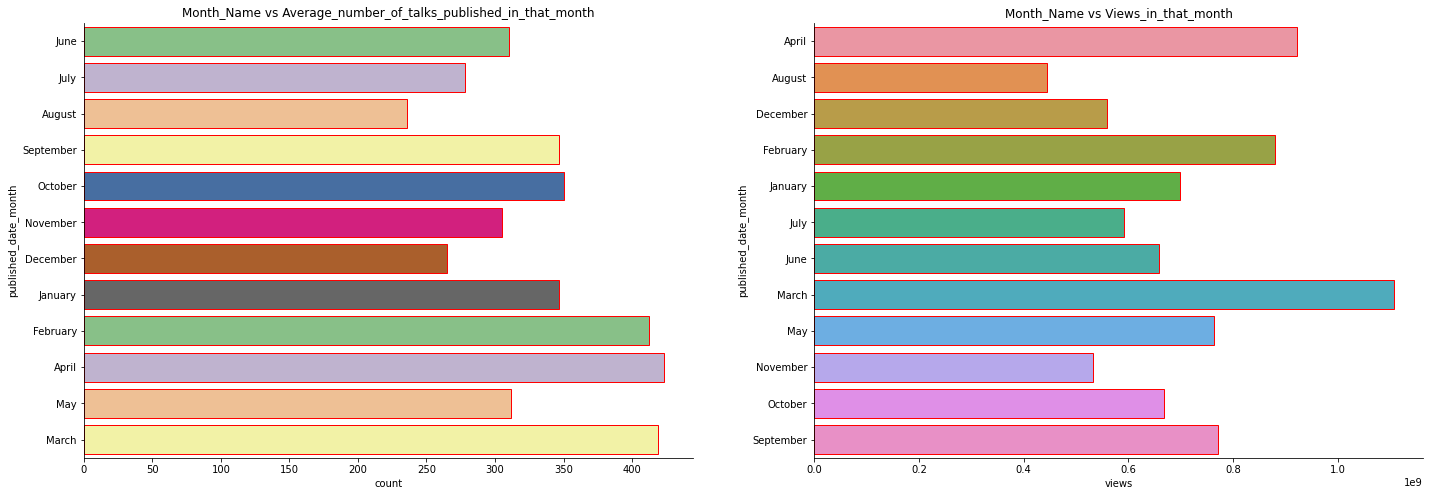

In [26]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))
ax = axes.flatten()

sns.countplot(data = Ted_non_null_df ,y='published_date_month',palette ='Accent', edgecolor='r', ax=ax[0])
ax[0].set_title('Month_Name vs Average_number_of_talks_published_in_that_month')

month_views = Ted_non_null_df.groupby('published_date_month')['views'].sum().reset_index() 
sns.barplot(x='views' , y= 'published_date_month' ,data = month_views, edgecolor='r', ax=ax[1])
ax[1].set_title('Month_Name vs Views_in_that_month')

sns.despine(fig)


* From first graph on an average the number of talks released in the month of April, March followed by October are higher.
* The number of talks released in August and December are comparitively lower than other months.
* From second graph we can see that August, November and December months seems to have less views, While March and April months have most number of views.

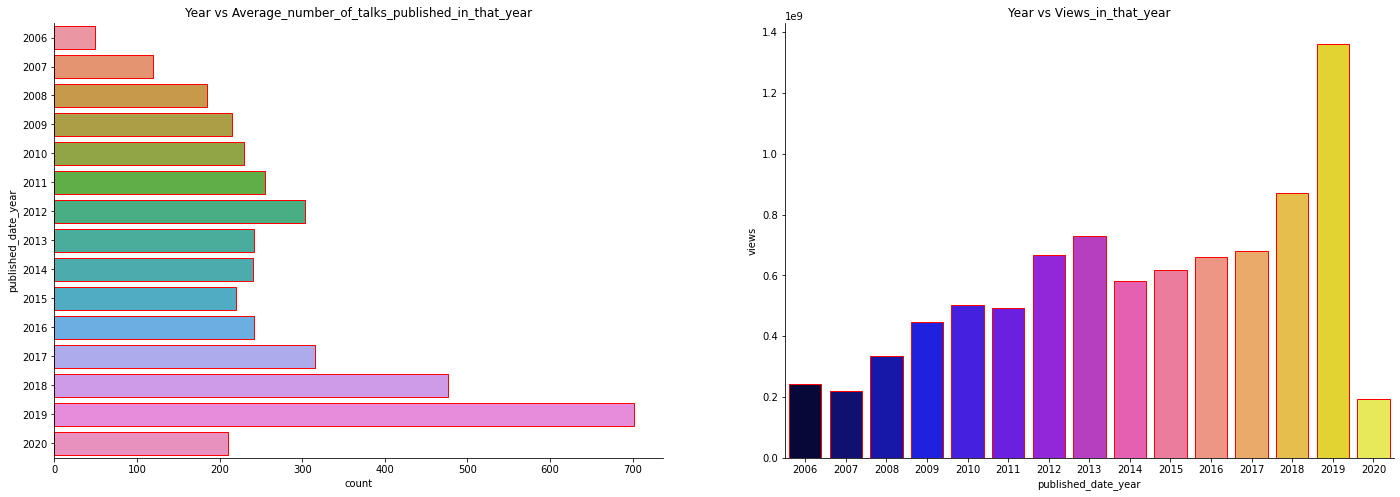

In [27]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))
ax = axes.flatten()

sns.countplot(data = Ted_non_null_df , y= 'published_date_year', edgecolor='r', ax=ax[0])
ax[0].set_title('Year vs Average_number_of_talks_published_in_that_year')


year_views  =Ted_non_null_df.groupby('published_date_year')['views'].sum().reset_index()
sns.barplot(data =year_views , x = 'published_date_year' , y = 'views',palette = 'gnuplot2', edgecolor='r', ax=ax[1])
ax[1].set_title('Year vs Views_in_that_year')

sns.despine(fig)


* From first bar graph the number of TED talks released in 2018 and 2019 higher followed by in 2012
* From second bar graph we can get insight that the number of views are higher in 2013 and 2018 and less in 2006, 2007 and 2020.

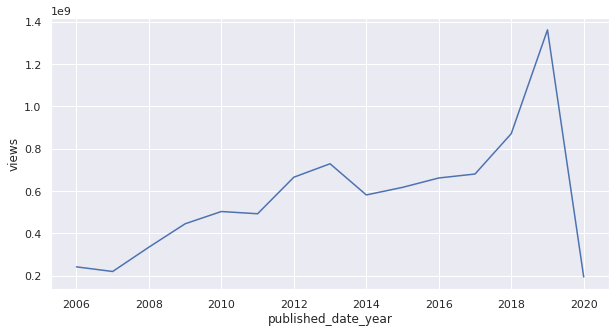

In [28]:

l_plot_data = Ted_non_null_df.groupby('published_date_year')['views'].sum().reset_index()
sns.set(rc = {'figure.figsize':(10, 5)})
sns.lineplot(l_plot_data['published_date_year'], l_plot_data['views'])
plt.show()


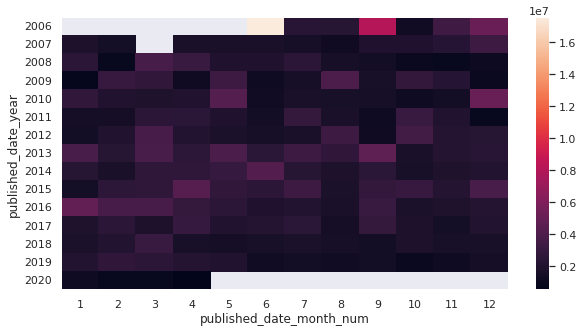

In [29]:

sns.set(rc = {'figure.figsize':(10, 5)})
sns.heatmap(Ted_non_null_df.pivot_table(values = 'views', index = 'published_date_year', columns = 'published_date_month_num'))
plt.show()


* Here the clear reason behind the sudden drop of views in 2020 is we have data only till April month of 2020.

---
### Exploring the 'speaker_1' Column
---

In [30]:

Ted_non_null_df[['speaker_1','duration','title','views']].sort_values(by = 'views',ascending  =False).head()


,speaker_1,duration,title,views
4,Sir Ken Robinson,1164,Do schools kill creativity?,65051954
1296,Amy Cuddy,1262,Your body language may shape who you are,57074270
2062,James Veitch,588,This is what happens when you reply to spam email,56932551
646,Simon Sinek,1084,How great leaders inspire action,49730580
796,Brené Brown,1219,The power of vulnerability,47544833


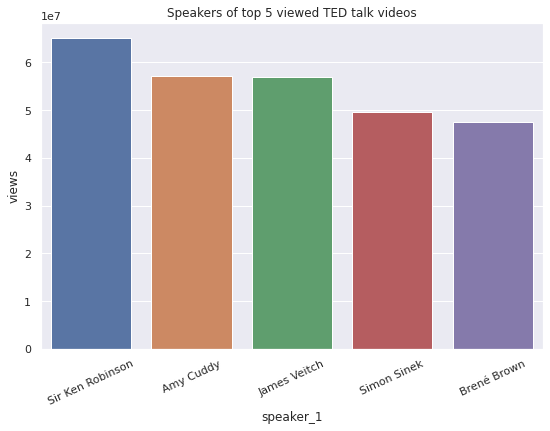

In [31]:

top_5_views = Ted_non_null_df[['speaker_1','duration','title','views']].sort_values(by = 'views',ascending  =False).head()
plt.figure(figsize = (9,6))
plt.xticks(rotation  = 25)
plt.title('Speakers of top 5 viewed TED talk videos')
sns.barplot(data =top_5_views ,x= 'speaker_1',y= 'views' )
plt.show()


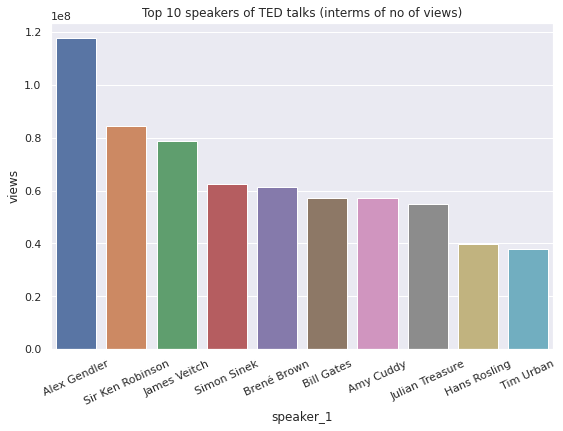

In [32]:

Ted_non_null_df.groupby('speaker_1')['views'].sum().nlargest(10).reset_index()

top_5_views = Ted_non_null_df.groupby('speaker_1')['views'].sum().nlargest(10).reset_index()
plt.figure(figsize = (9, 6))
plt.xticks(rotation  = 25)
plt.title('Top 10 speakers of TED talks (interms of no of views)')
sns.barplot(data =top_5_views ,x= 'speaker_1',y= 'views' )
plt.show()


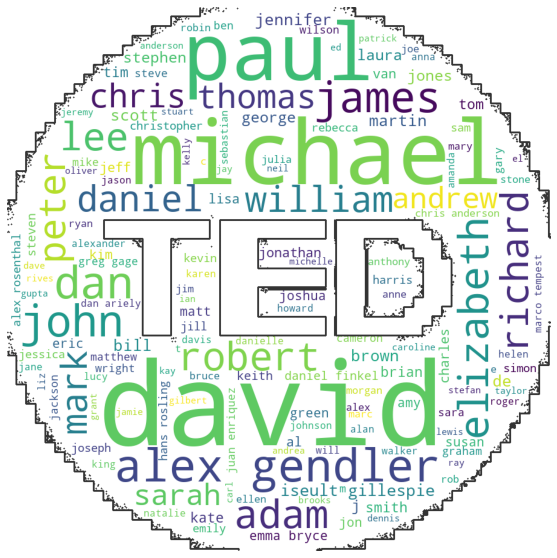

In [33]:
corpus = list(Ted_non_null_df['speaker_1'].values)

from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
import requests
import io
response = requests.get("https://i2.wp.com/norfolkpl.org/wp-content/uploads/2019/01/ted-talk-logo.jpg?ssl=1")
image_bytes = io.BytesIO(response. content)
dataset = " ".join(corpus)
def create_word_cloud(string):

    maskArray = npy.array(Image.open(image_bytes))
    cloud = WordCloud(background_color = "white", max_words = 150, mask = maskArray, stopwords = set(STOPWORDS),contour_width = 3, contour_color='#333')
    cloud.generate(string)
#     cloud.to_file("wordCloud.png")
    return cloud
dataset = dataset.lower()
wordcloud=create_word_cloud(dataset)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()


---
### Exploring the 'event' Column
---

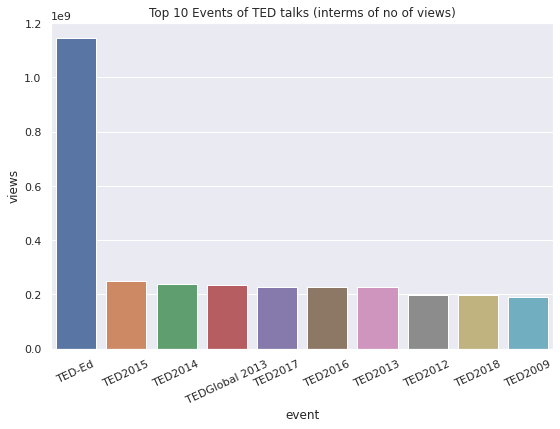

In [34]:
event_views = Ted_non_null_df.groupby('event')['views'].sum().nlargest(10).reset_index()
plt.figure(figsize = (9, 6))
plt.xticks(rotation  = 25)
plt.title('Top 10 Events of TED talks (interms of no of views)')
sns.barplot(data =event_views,x= 'event',y= 'views' )
plt.show()

---
### Exploring the 'available_lang' Column
---

In [35]:
# Finding the length of the each observation of 'available_lang' column.

Ted_non_null_df['available_lang'] = Ted_non_null_df.apply(lambda row: eval(row['available_lang']), axis=1)
Ted_non_null_df['num_of_available_lang'] = Ted_non_null_df.apply(lambda x: len(x['available_lang']), axis=1)


In [36]:
Ted_non_null_df.sample(3)

,talk_id,title,speaker_1,views,recorded_date,published_date,event,native_lang,available_lang,duration,...,occupations,comments,No_of_days_to_release,published_date_year,published_date_month,published_date_month_num,published_date_day,published_date_day_name,published_date_day_num,num_of_available_lang
1795,2114,Should you donate differently?,Joy Sun,1312433,2014-07-08,2014-10-22,TED@NYC,en,"[ar, bg, cs, de, el, en, es, fa, fr, he, hr, h...",455,...,{0: ['veteran aid worker']},127,106,2014,October,10,22,Wednesday,2,34
2617,8418,3 thoughtful ways to conserve water,Lana Mazahreh,1200611,2017-10-04,2018-01-03,TED@BCG Milan,en,"[ar, cs, de, el, en, es, fa, fr, it, ja, ko, m...",682,...,{0: ['water conservation activist']},44,91,2018,January,1,3,Wednesday,2,21
377,462,Our loss of wisdom,Barry Schwartz,4113823,2009-02-07,2009-02-16,TED2009,en,"[ar, bg, cs, da, de, el, en, es, et, fa, fr, f...",1245,...,{0: ['psychologist']},527,9,2009,February,2,16,Monday,0,37


Text(0.5, 1.0, 'Distribution')

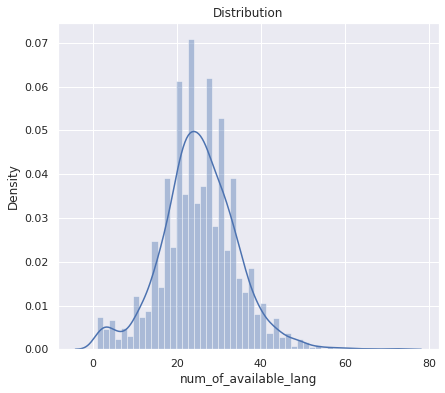

In [37]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
sns.distplot(Ted_non_null_df['num_of_available_lang'])
plt.title('Distribution')

---
### Exploring the 'occupations' Column
---

In [38]:

Ted_non_null_df['occupations'] = Ted_non_null_df.apply(lambda row: eval(row['occupations']), axis=1) 

for index, row in Ted_non_null_df.iterrows():
    occup_list=list(row['occupations'].values())[0][0]
    Ted_non_null_df.loc[index,'occupation'] = str(occup_list)
 
Ted_non_null_df.sample(2)


,talk_id,title,speaker_1,views,recorded_date,published_date,event,native_lang,available_lang,duration,...,comments,No_of_days_to_release,published_date_year,published_date_month,published_date_month_num,published_date_day,published_date_day_name,published_date_day_num,num_of_available_lang,occupation
1952,2291,How a driverless car sees the road,Chris Urmson,2552451,2015-03-16,2015-06-26,TED2015,en,"[ar, bg, de, el, en, es, fa, fr, he, hr, hu, i...",929,...,208,102,2015,June,6,26,Friday,4,27,roboticist
1138,1403,"Unlock the intelligence, passion, greatness of...",Leymah Gbowee,1331417,2012-03-02,2012-03-28,TED2012,en,"[ar, bg, da, de, el, en, es, fa, fr, fr-ca, he...",879,...,121,26,2012,March,3,28,Wednesday,2,34,peace activist


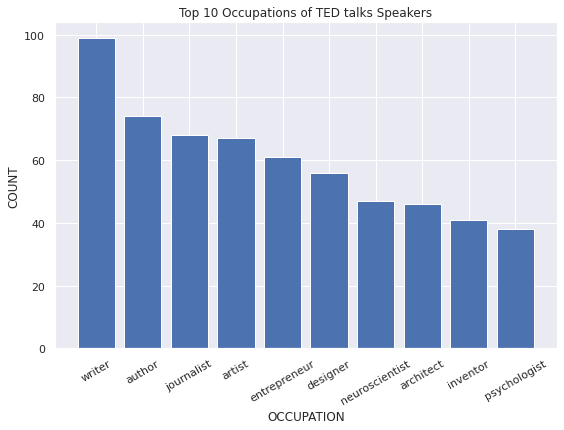

In [39]:

plt.figure(figsize = (9, 6))

top_10 = Ted_non_null_df.groupby('occupation').size().nlargest(11).reset_index()
top_10 = top_10[1:11]
x = list(top_10['occupation'])
y = list(top_10[0])

plt.bar(x, y )

plt.xlabel('OCCUPATION')
plt.ylabel('COUNT')
plt.title('Top 10 Occupations of TED talks Speakers')
plt.xticks(rotation = 30)
plt.show()


---
### Exploring the 'topics' Column
---

In [40]:
# Finding the length of the no of topics in each observation of 'topics' column.

Ted_non_null_df['topics'] = Ted_non_null_df.apply(lambda row: eval(row['topics']), axis=1) 
Ted_non_null_df['num_of_topics'] = Ted_non_null_df.apply(lambda x: len(x['topics']), axis=1)
Ted_non_null_df.sample(2)


,talk_id,title,speaker_1,views,recorded_date,published_date,event,native_lang,available_lang,duration,...,No_of_days_to_release,published_date_year,published_date_month,published_date_month_num,published_date_day,published_date_day_name,published_date_day_num,num_of_available_lang,occupation,num_of_topics
3944,60080,How we could change the planet's climate future,David Wallace-Wells,1062677,2019-09-24,2020-03-13,We the Future,en,"[en, es, fa, he, hr, it, ko, ku, nl, pt-br, sl...",681,...,171,2020,March,3,13,Friday,4,13,journalist,8
1205,1471,"Design, explained.",John Hodgman,1202742,2012-03-01,2012-06-08,TED2012,en,"[ar, bg, cs, da, de, el, en, es, fa, fr, he, h...",383,...,99,2012,June,6,8,Friday,4,35,expert,4


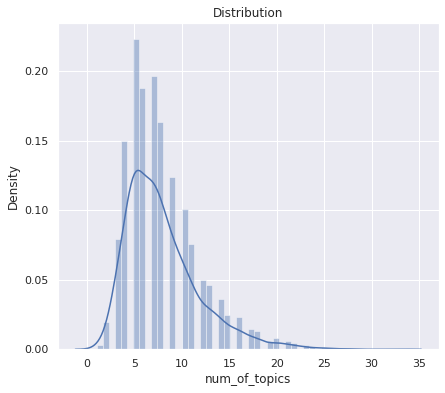

In [41]:

plt.figure(figsize=(15, 6))
plt.subplot(121)
sns.distplot(Ted_non_null_df['num_of_topics'])
plt.title('Distribution')
plt.show()


---
### Exploring the 'native_lang' Column
---

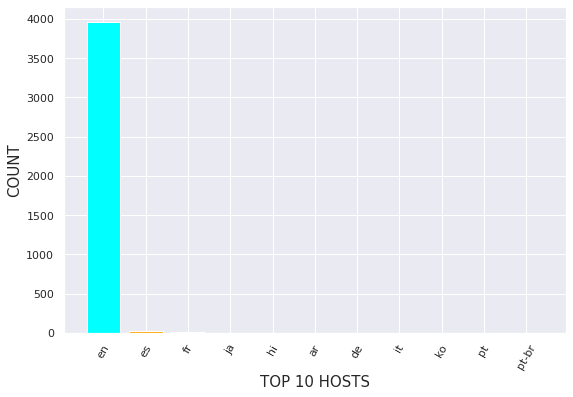

In [42]:

plt.figure(figsize = (9, 6))

c = ['aqua', 'orange', 'magenta', 'gold', 'lightblue', 'lime', 'sienna', 'salmon', 'grey', 'bisque']

top_10 = Ted_non_null_df.groupby('native_lang').size().nlargest(11).reset_index()
# top_10 = top_10[1:11]
x = list(top_10['native_lang'])
y = list(top_10[0])

plt.bar(x, y, color = c)

plt.xlabel('TOP 10 HOSTS', fontsize = 15)
plt.ylabel('COUNT', fontsize = 15)
plt.xticks(rotation = 60)
plt.show()


* This column won't be useful for our models as this is imbalanced feature

---
### Exploring the 'title' Column
---

There are 157099 words in the combination of all titles.


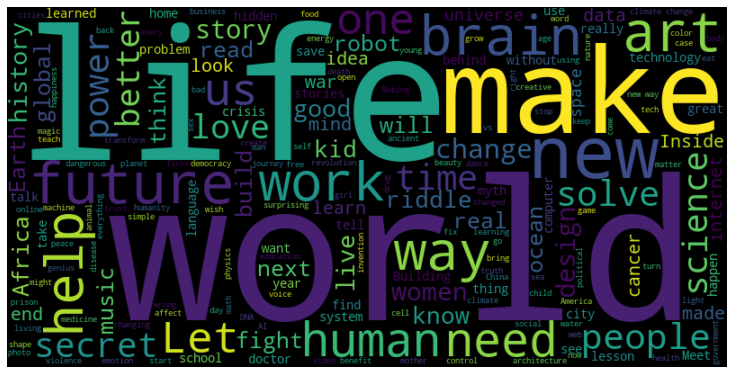

In [43]:
from wordcloud import WordCloud,ImageColorGenerator

#making of word cloud from title column
text = " ".join(topic for topic in Ted_non_null_df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="black", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15, 5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


---
## Applying Mean Encoding to the Features having high cardinality
---

In [44]:
# Finding the number of unique types of values present in the following columns.

print(f'The no of Unique columns in speaker_1 column:',Ted_non_null_df['speaker_1'].nunique())
print(f'The no of Unique columns in event column:',Ted_non_null_df['event'].nunique())
print(f'The no of Unique columns in occupation column:',Ted_non_null_df['occupation'].nunique())


The no of Unique columns in speaker_1 column: 3273
The no of Unique columns in event column: 458
The no of Unique columns in occupation column: 1552


* Clearly these columns have high cardinality

In [45]:
# Applying Mean Encoding 

col_for_me = ['speaker_1', 'event', 'occupation']

for co in col_for_me:
    mean_encoding = Ted_non_null_df.groupby(co)['views'].mean().to_dict()
    Ted_non_null_df[co + '_avg_views']=Ted_non_null_df[co].map(mean_encoding)
   
Ted_non_null_df.sample(2)

,talk_id,title,speaker_1,views,recorded_date,published_date,event,native_lang,available_lang,duration,...,published_date_month_num,published_date_day,published_date_day_name,published_date_day_num,num_of_available_lang,occupation,num_of_topics,speaker_1_avg_views,event_avg_views,occupation_avg_views
2978,25572,3 ways to be a better ally in the workplace,Melinda Epler,2168643,2018-06-07,2018-10-04,TED Salon Brightline Initiative,en,"[ar, en, es, fa, fr, he, hi, hr, hu, ko, pt, p...",577,...,10,4,Thursday,3,17,writer,10,2168643.0,2.049377e+06,3.299067e+06
2228,2532,Architecture that's built to heal,Michael Murphy,1582762,2016-02-17,2016-09-15,TED2016,en,"[ar, bg, de, el, en, es, fa, fr, he, it, ja, k...",938,...,9,15,Thursday,3,22,designer,16,1582762.0,3.031448e+06,1.637676e+06


---
## Dealing with Outliers
---

In [46]:
col_to_do = ['views', 'duration', 'comments', 'No_of_days_to_release', 'speaker_1_avg_views', 'event_avg_views', 'occupation_avg_views', 'num_of_available_lang', 'num_of_topics']

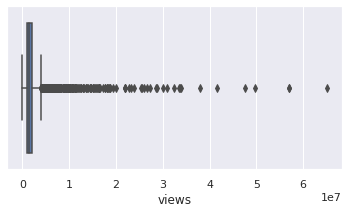

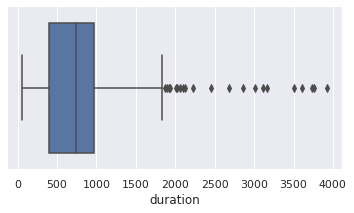

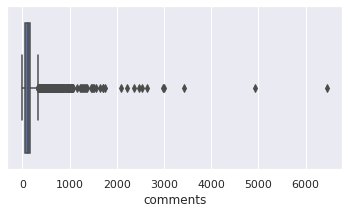

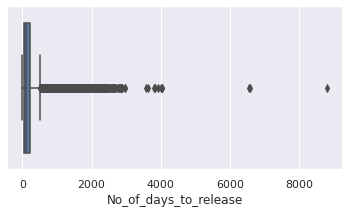

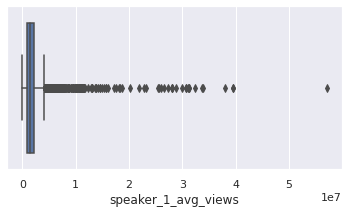

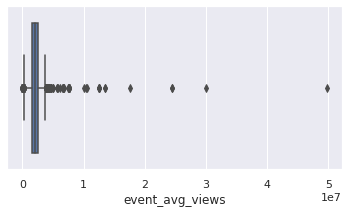

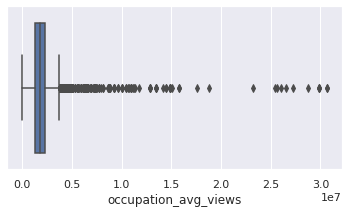

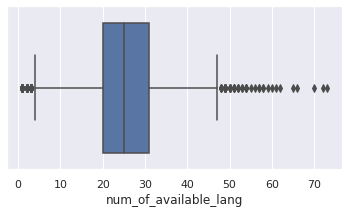

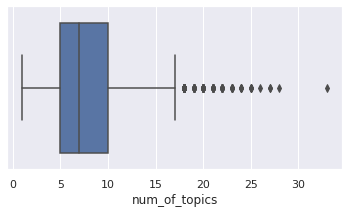

In [47]:

for co in col_to_do:
    
    plt.figure(figsize=(6,3))
    sns.boxplot(Ted_non_null_df[co])
    plt.show()
    

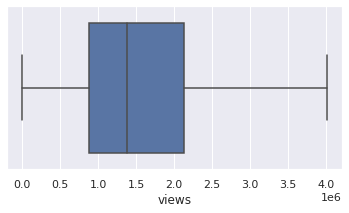

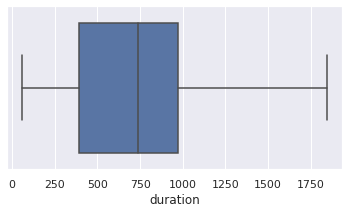

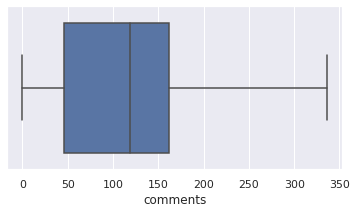

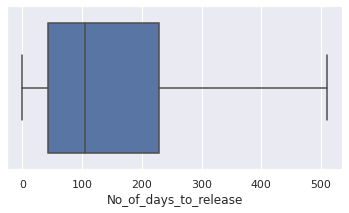

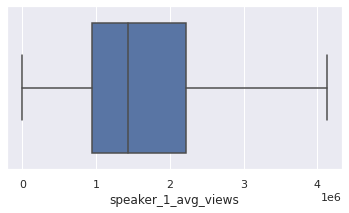

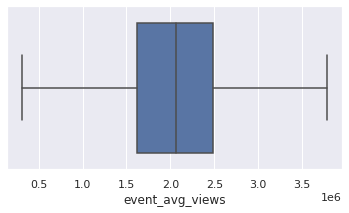

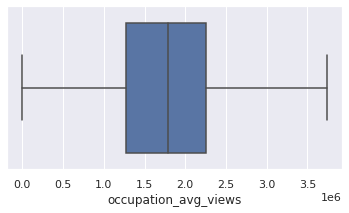

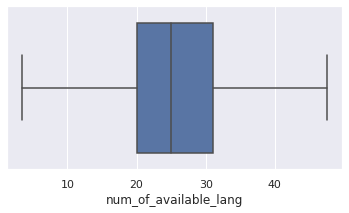

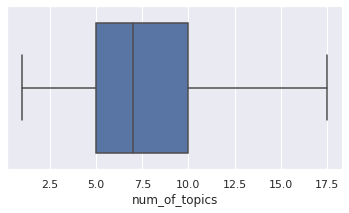

In [48]:
for co in col_to_do:
    
    percentile25 = Ted_non_null_df[co].quantile(0.25)
    percentile75 = Ted_non_null_df[co].quantile(0.75)

    iqr = percentile75 - percentile25

    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    Ted_non_null_df[co] = np.where(
        Ted_non_null_df[co] > upper_limit,
        upper_limit,
        np.where(
            Ted_non_null_df[co] < lower_limit,
            lower_limit,
            Ted_non_null_df[co]
        )
    )

    plt.figure(figsize=(6,3))
    sns.boxplot(Ted_non_null_df[co])
    plt.show()

In [49]:
# Dropping unnecessary columns 

Ted_non_null_df.drop( columns = ['talk_id', 'title', 'speaker_1', 'recorded_date', 'published_date',
                                 'event', 'native_lang', 'available_lang', 'topics', 'all_speakers', 'occupations', 'occupation'], inplace = True)


---
## Applying One-Hot-Encoding on string categorical columns
---

In [50]:

y = Ted_non_null_df['views']
X = Ted_non_null_df.drop(columns='views')


In [51]:

X = pd.get_dummies(X, drop_first= True)
print(X.shape)
X.sample(5)


(4004, 29)


,duration,comments,No_of_days_to_release,published_date_year,published_date_month_num,published_date_day,published_date_day_num,num_of_available_lang,num_of_topics,speaker_1_avg_views,...,published_date_month_May,published_date_month_November,published_date_month_October,published_date_month_September,published_date_day_name_Monday,published_date_day_name_Saturday,published_date_day_name_Sunday,published_date_day_name_Thursday,published_date_day_name_Tuesday,published_date_day_name_Wednesday
3796,663.0,9.0,100.0,2020,1,2,3,13.0,10.0,1249830.0,...,0,0,0,0,0,0,0,1,0,0
2983,250.0,161.0,0.0,2018,10,9,1,16.0,2.0,1445220.0,...,0,0,1,0,0,0,0,0,1,0
2390,425.0,61.0,11.0,2017,5,5,4,31.0,8.0,1216773.0,...,1,0,0,0,0,0,0,0,0,0
3253,261.0,161.0,0.0,2019,2,28,3,20.0,12.0,373761.0,...,0,0,0,0,0,0,0,1,0,0
2574,421.0,23.0,163.0,2017,11,16,3,29.0,9.0,1262020.0,...,0,1,0,0,0,0,0,1,0,0


---
## Feature Selection
---

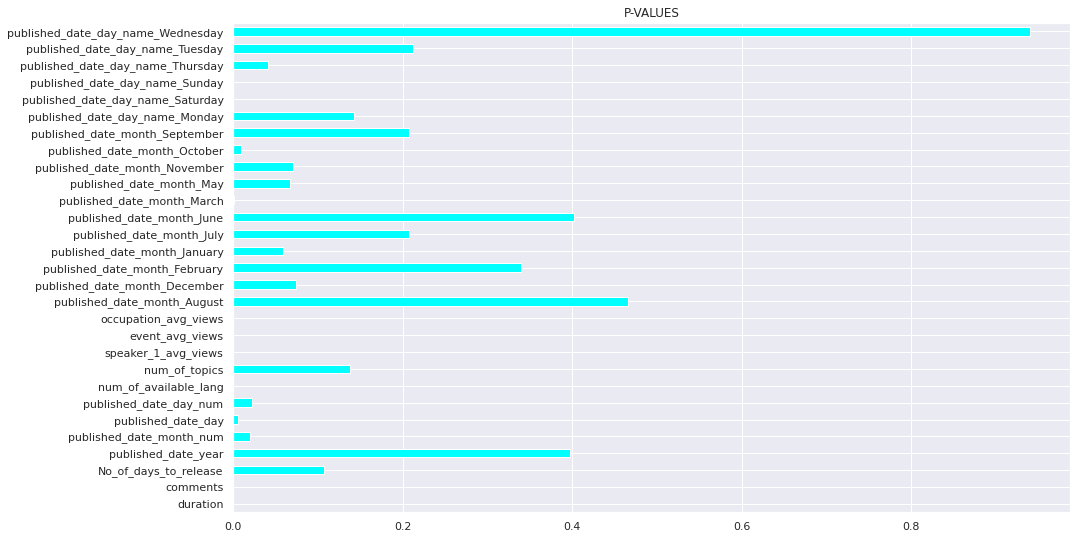

In [52]:

f_scores = f_regression(X, y)
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='barh',color='aqua',figsize=(15,9))
plt.title('P-VALUES')
plt.show()


In [53]:

selected_features = np.where(p_values<0.005)[0]
X=X.iloc[0:,selected_features]


---
## Checking for Multicollinearity between features
---

In [54]:
# Function to caluclate VIF values of features.

def vif_calc(X):
    
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
    return(vif)


In [55]:
X.drop('num_of_available_lang',axis=1,inplace=True)

In [56]:
vif_calc(X)

,variables,VIF
0,duration,4.236098
1,comments,3.491131
2,speaker_1_avg_views,6.244480
3,event_avg_views,6.477145
4,occupation_avg_views,8.059491
5,published_date_month_March,1.114383
6,published_date_day_name_Saturday,1.019134
7,published_date_day_name_Sunday,1.029632


In [57]:
X.drop('occupation_avg_views',axis=1,inplace=True)
vif_calc(X)

,variables,VIF
0,duration,4.007279
1,comments,3.433229
2,speaker_1_avg_views,4.303910
3,event_avg_views,5.980209
4,published_date_month_March,1.113024
5,published_date_day_name_Saturday,1.019085
6,published_date_day_name_Sunday,1.029380


# MODELS IMPLEMENTATION

---
# Linear Regression
---

In [58]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

In [60]:
# Fitting the model.

reg = LinearRegression().fit(X_train, y_train)

# Predicting the values for train and test data.
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
LR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , LR_Train_MAE)
LR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , LR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
LR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , LR_Train_MSE)
LR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , LR_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
LR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , LR_Train_RMSE)
LR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , LR_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
LR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , LR_Train_R2)
LR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , LR_Test_R2)

# Adjusted R2 of Training and Testing Data.
LR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", LR_Adjusted_R2)


Train Data MAE : 269752.95104541804
Test Data MAE : 253960.9399046614
Train Data MSE : 241727287163.64017
Test Data MSE : 204723896792.73013
Train Data RMSE: 491657.6930788739
Test Data RMSE: 452464.24918741384
R2 : 0.8019581669038164
R2 : 0.8301124981970256
Adjusted R2 :  0.8291165078179462


---
# Lasso Regularization
---

In [61]:

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': [ 1e-24, 1e-21, 1e-18, 1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,110,120,150,160,170,200]}
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-24, 1e-21, 1e-18, 1e-15, 1e-13, 1e-10,
                                   1e-08, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 40, 45, 50, 55, 60, 100, 110,
                                   120, 150, 160, 170, 200]},
             scoring='neg_mean_squared_error')

In [62]:

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)
     

The best fit alpha value is found out to be : {'alpha': 1e-13}

Using  {'alpha': 1e-13}  the negative mean squared error is:  -243681084237.1347


In [63]:
# Fitting the model.

lasso  = Lasso(alpha=1e-13 , max_iter= 3000)
lasso.fit(X_train, y_train)

# Predicting the values for train and test data.
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
LA_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , LA_Train_MAE)
LA_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , LA_Test_MAE)

# Mean Squared Error of Training and Testing Data.
LA_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , LA_Train_MSE)
LA_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , LA_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
LA_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , LA_Train_RMSE)
LA_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , LA_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
LA_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , LA_Train_R2)
LA_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , LA_Test_R2)

# Adjusted R2 of Training and Testing Data.
LA_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", LA_Adjusted_R2)


Train Data MAE : 269752.95104541804
Test Data MAE : 253960.9399046614
Train Data MSE : 241727287163.64017
Test Data MSE : 204723896792.73013
Train Data RMSE: 491657.6930788739
Test Data RMSE: 452464.24918741384
R2 : 0.8019581669038164
R2 : 0.8301124981970256
Adjusted R2 :  0.8291165078179462


---
# Ridge Regularization
---

In [64]:
from sklearn.linear_model import Ridge
RI = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100, 5000]}
R_R = GridSearchCV(RI, parameters, cv=5)
R_R.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 5000]})

In [65]:
print(R_R.best_params_)

{'alpha': 5000}


In [66]:
# Predicting the values for train and test data.
y_train_pred = R_R.predict(X_train)
y_test_pred = R_R.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
RR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , RR_Train_MAE)
RR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , RR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
RR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , RR_Train_MSE)
RR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , RR_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
RR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , RR_Train_RMSE)
RR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , RR_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
RR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , RR_Train_R2)
RR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , RR_Test_R2)

# Adjusted R2 of Training and Testing Data.
RR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", RR_Adjusted_R2)


Train Data MAE : 269299.57801755075
Test Data MAE : 253951.5150508975
Train Data MSE : 242101043315.0592
Test Data MSE : 205743961532.166
Train Data RMSE: 492037.6442052571
Test Data RMSE: 453590.0809455229
R2 : 0.8016519567352147
R2 : 0.8292660105471958
Adjusted R2 :  0.8282650575102029


---
# Elastic Net Regularization
---

In [67]:

from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,110,120,150],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 110, 120, 150],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [68]:

print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 100, 'l1_ratio': 0.3}

Using  {'alpha': 100, 'l1_ratio': 0.3}  the negative mean squared error is:  -243334399227.13428


In [69]:
# Predicting the values for train and test data.
y_train_pred = elastic_regressor.predict(X_train)
y_test_pred = elastic_regressor.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
ER_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , ER_Train_MAE)
ER_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , ER_Test_MAE)

# Mean Squared Error of Training and Testing Data.
ER_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , ER_Train_MSE)
ER_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , ER_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
ER_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , ER_Train_RMSE)
ER_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , ER_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
ER_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , ER_Train_R2)
ER_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , ER_Test_R2)

# Adjusted R2 of Training and Testing Data.
ER_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", ER_Adjusted_R2)


Train Data MAE : 269231.9476119404
Test Data MAE : 253899.85529762367
Train Data MSE : 242113183686.40677
Test Data MSE : 205778301309.6862
Train Data RMSE: 492049.98088243714
Test Data RMSE: 453627.93268237595
R2 : 0.8016420103968251
R2 : 0.8292375141229544
Adjusted R2 :  0.8282363940214977


---
# Decision Tree Regression 
---

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [71]:
param_grid = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],'criterion':['mse','mae']}
CV = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid, cv=5)
CV.fit(X_train,y_train)
CV.best_params_

{'criterion': 'mse', 'max_depth': 5}

In [72]:
# Fitting the model.

DTR = DecisionTreeRegressor(criterion = 'mse', max_depth=4)
DTR.fit(X_train,y_train)

# Predicting the values for train and test data.
y_train_pred = DTR.predict(X_train)
y_test_pred = DTR.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
DTR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , DTR_Train_MAE)
DTR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , DTR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
DTR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , DTR_Train_MSE)
DTR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , DTR_Test_MSE)

# Root Mean Squared error of test data.
DTR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , DTR_Train_RMSE)
DTR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE :" , DTR_Test_RMSE)

# Coefficient of determination of test data.
DTR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , DTR_Train_R2)
DTR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , DTR_Test_R2)

# Adjusted R2 of test data.
DTR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", DTR_Adjusted_R2)


Train Data MAE : 250880.5491515649
Test Data MAE : 250674.39799746612
Train Data MSE : 211519337118.7256
Test Data MSE : 219410679445.0487
Train Data RMSE: 459912.31459782156
Test Data RMSE : 468412.93688907515
R2 : 0.8267068738916334
R2 : 0.8179248598537998
Adjusted R2 :  0.8168574176586378


---
# Random Forest Regressor 
---

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
RFR = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [75]:
RFR.fit(X_train, y_train)
y_train_pred = RFR.predict(X_train)
y_test_pred = RFR.predict(X_test)

In [76]:
# Mean Absolute Error of Training and Testing Data.
RFR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , RFR_Train_MAE)
RFR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , RFR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
RFR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , RFR_Train_MSE)
RFR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , RFR_Test_MSE)

# Root Mean Squared error of test data.
RFR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , RFR_Train_RMSE)
RFR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE :" , RFR_Test_RMSE)

# Coefficient of determination of test data.
RFR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , RFR_Train_R2)
RFR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , RFR_Test_R2)

# Adjusted R2 of test data.
RFR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", RFR_Adjusted_R2)


Train Data MAE : 102541.84528907923
Test Data MAE : 223349.83035773708
Train Data MSE : 51253127220.25843
Test Data MSE : 214789355616.22217
Train Data RMSE: 226391.53522218633
Test Data RMSE : 463453.725431377
R2 : 0.9580094436763338
R2 : 0.8217598062015472
Adjusted R2 :  0.8207148469414223


* Hyperparametric Tuning

In [77]:
RFR_H = RandomForestRegressor(criterion='mae')
grid_values = {'n_estimators':[50, 60, 70, 80, 90, 100 ], 'max_depth':[ 3, 4, 5, 6, 7, ]}
RFR_H_grid = GridSearchCV(RFR_H, param_grid = grid_values, cv=3, n_jobs=-1)

# Fit the object to train dataset
RFR_H_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(criterion='mae'), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [50, 60, 70, 80, 90, 100]})

In [78]:
RFR_H_grid_optimal_model = RFR_H_grid.best_estimator_

In [79]:
y_train_pred =  RFR_H_grid_optimal_model.predict(X_train)
y_test_pred  = RFR_H_grid_optimal_model.predict(X_test)

In [80]:
# Mean Absolute Error of Training and Testing Data.
RFR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , RFR_Train_MAE)
RFR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , RFR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
RFR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , RFR_Train_MSE)
RFR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , RFR_Test_MSE)

# Root Mean Squared error of test data.
RFR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , RFR_Train_RMSE)
RFR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE :" , RFR_Test_RMSE)

# Coefficient of determination of test data.
RFR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , RFR_Train_R2)
RFR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , RFR_Test_R2)

# Adjusted R2 of test data.
RFR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", RFR_Adjusted_R2)


Train Data MAE : 179456.30172793244
Test Data MAE : 178817.71982806435
Train Data MSE : 194664490991.11682
Test Data MSE : 196722787088.55426
Train Data RMSE: 441207.99062473566
Test Data RMSE : 443534.42604667594
R2 : 0.8405156774521767
R2 : 0.8367521165346453
Adjusted R2 :  0.8357950518912136


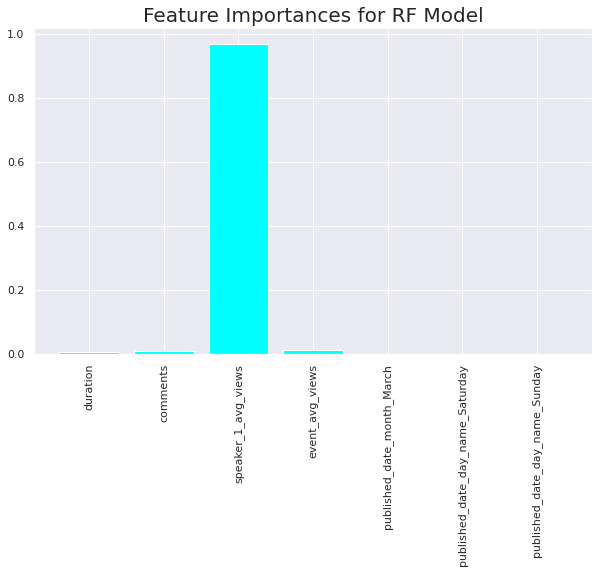

In [81]:
# getting features according to their importance in prediction

features = X_train.columns
importances = RFR_H_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.bar(x=features, height=importances, color='aqua')
plt.title('Feature Importances for RF Model', size=20)
plt.xticks(rotation='vertical')
plt.show()

---
# Ada Boost Regressor 
---

In [82]:

from sklearn.ensemble import AdaBoostRegressor

grid = dict()
grid['n_estimators'] = [1, 5, 10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=grid, n_jobs=-1, cv=5)
grid_result = grid_search.fit(X_train , y_train)
print(grid_result.best_params_)


{'learning_rate': 0.001, 'n_estimators': 5}


In [83]:

# Predicting the values for train and test data.
y_train_pred = grid_result.predict(X_train)
y_test_pred = grid_result.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
AB_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , AB_Train_MAE)
AB_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , AB_Test_MAE)

# Mean Squared Error of Training and Testing Data.
AB_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , AB_Train_MSE)
AB_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , AB_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
AB_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , AB_Train_RMSE)
AB_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , AB_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
AB_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , AB_Train_R2)
AB_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , AB_Test_R2)

# Adjusted R2 of Training and Testing Data.
AB_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", AB_Adjusted_R2)


Train Data MAE : 283618.8139955167
Test Data MAE : 278043.48315606685
Train Data MSE : 242536162597.72992
Test Data MSE : 235704704953.47318
Train Data RMSE: 492479.6062759654
Test Data RMSE: 485494.28931087663
R2 : 0.8012954731070455
R2 : 0.8044034716265
Adjusted R2 :  0.8032567583110775


---
# Gradient Boost Regressor 
---

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

grid = dict()
grid['n_estimators'] = [1, 3, 5, 10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0, 100]
grid['max_depth'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


grid_search_gb = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid=grid, n_jobs=-1, cv=5)
grid_result = grid_search_gb.fit(X_train , y_train)
print(grid_result.best_params_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


In [85]:

# Predicting the values for train and test data.
y_train_pred = grid_result.predict(X_train)
y_test_pred = grid_result.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
GB_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , GB_Train_MAE)
GB_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , GB_Test_MAE)

# Mean Squared Error of Training and Testing Data.
GB_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , GB_Train_MSE)
GB_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , GB_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
GB_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , GB_Train_RMSE)
GB_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , GB_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
GB_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , GB_Train_R2)
GB_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , GB_Test_R2)

# Adjusted R2 of Training and Testing Data.
GB_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", GB_Adjusted_R2)


Train Data MAE : 206282.5133957873
Test Data MAE : 210107.05739447902
Train Data MSE : 171943672346.92993
Test Data MSE : 183190098478.98495
Train Data RMSE: 414660.91248986794
Test Data RMSE: 428007.12433204305
R2 : 0.8591303428734397
R2 : 0.8479820447285431
Adjusted R2 :  0.8470908171850756


---
# XG Boost Regressor 
---

In [86]:

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor(learning_rate=0.1)
grid_values = {'n_estimators':[10, 30, 50, 80, 100], 'max_depth':[1, 3, 5, 7, 9]}
xgb_random = RandomizedSearchCV(xgb, param_distributions = grid_values, cv=3)

# Fit the object to train dataset
xgb_random.fit(X_train, y_train)


[17:14:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=3, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [10, 30, 50, 80, 100]})

In [87]:

# finding the optimal model w.r.t. best_estimator_
xgb_optimal_model = xgb_random.best_estimator_
xgb_optimal_model


XGBRegressor()

In [88]:
# Predicting the values for train and test data.

y_train_pred =  xgb_optimal_model.predict(X_train)
y_test_pred  = xgb_optimal_model.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
XG_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , XG_Train_MAE)
XG_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , XG_Test_MAE)

# Mean Squared Error of Training and Testing Data.
XG_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , XG_Train_MSE)
XG_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , XG_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
XG_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , XG_Train_RMSE)
XG_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , XG_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
XG_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , XG_Train_R2)
XG_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , XG_Test_R2)

# Adjusted R2 of Training and Testing Data.
XG_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", XG_Adjusted_R2)


Train Data MAE : 196696.66039742818
Test Data MAE : 210059.153406432
Train Data MSE : 156930302338.62024
Test Data MSE : 183293033801.44815
Train Data RMSE: 396144.29484547704
Test Data RMSE: 428127.35698790394
R2 : 0.8714304656782934
R2 : 0.8478966251705211
Adjusted R2 :  0.8470048968423751


In [89]:
# getting features according to their importance in prediction
xgb_features = X_train.columns
xgb_importances = xgb_random.best_estimator_.feature_importances_
xgb_indices = np.argsort(xgb_importances)

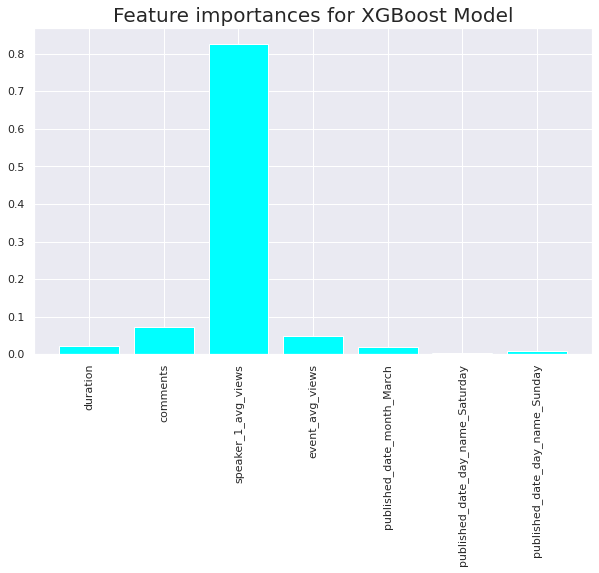

In [90]:
plt.figure(figsize=(10,6))
plt.bar(x=xgb_features, height=xgb_importances, color='aqua')
plt.title('Feature importances for XGBoost Model', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [91]:
ml_models = [{'Model Name': 'Linear Regression',
                 'Train MAE': LR_Train_MAE, 'Test MAE': LR_Test_MAE,
                 'Train MSE': LR_Train_MSE, 'Test MSE ': LR_Test_MSE,
                 'Train RMSE': LR_Train_RMSE, 'Test RMSE': LR_Test_MSE, 
                 'Train R2': LR_Train_R2, 'Test R2': LR_Test_R2,
                 'Adjusted R2': LR_Adjusted_R2},
            {'Model Name': 'Lasso Regularization',
                 'Train MAE': LA_Train_MAE, 'Test MAE': LA_Test_MAE,
                 'Train MSE': LA_Train_MSE, 'Test MSE ': LA_Test_MSE,
                 'Train RMSE': LA_Train_RMSE, 'Test RMSE': LA_Test_MSE, 
                 'Train R2': LA_Train_R2, 'Test R2': LA_Test_R2,
                 'Adjusted R2': LA_Adjusted_R2},
            {'Model Name': 'Ridge Regularization',
                 'Train MAE': RR_Train_MAE, 'Test MAE': RR_Test_MAE,
                 'Train MSE': RR_Train_MSE, 'Test MSE ': RR_Test_MSE,
                 'Train RMSE': RR_Train_RMSE, 'Test RMSE': RR_Test_MSE, 
                 'Train R2': RR_Train_R2, 'Test R2': RR_Test_R2,
                 'Adjusted R2': RR_Adjusted_R2},
            {'Model Name': 'Elastic Net Regularization',
                 'Train MAE': ER_Train_MAE, 'Test MAE': ER_Test_MAE,
                 'Train MSE': ER_Train_MSE, 'Test MSE ': ER_Test_MSE,
                 'Train RMSE': ER_Train_RMSE, 'Test RMSE': ER_Test_MSE, 
                 'Train R2': ER_Train_R2, 'Test R2': ER_Test_R2,
                 'Adjusted R2': ER_Adjusted_R2},
            {'Model Name': 'Decision Tree Regression',
                 'Train MAE': DTR_Train_MAE, 'Test MAE': DTR_Test_MAE,
                 'Train MSE': DTR_Train_MSE, 'Test MSE ': DTR_Test_MSE,
                 'Train RMSE': DTR_Train_RMSE, 'Test RMSE': DTR_Test_MSE, 
                 'Train R2': DTR_Train_R2, 'Test R2': DTR_Test_R2,
                 'Adjusted R2': DTR_Adjusted_R2},
            {'Model Name': 'Random Forest Regression',
                 'Train MAE': RFR_Train_MAE, 'Test MAE': RFR_Test_MAE,
                 'Train MSE': RFR_Train_MSE, 'Test MSE ': RFR_Test_MSE,
                 'Train RMSE': RFR_Train_RMSE, 'Test RMSE': RFR_Test_MSE, 
                 'Train R2': RFR_Train_R2, 'Test R2': RFR_Test_R2,
                 'Adjusted R2': RFR_Adjusted_R2},
            {'Model Name': 'Ada Boost Regression',
                 'Train MAE': AB_Train_MAE, 'Test MAE': AB_Test_MAE,
                 'Train MSE': AB_Train_MSE, 'Test MSE ': AB_Test_MSE,
                 'Train RMSE': AB_Train_RMSE, 'Test RMSE': AB_Test_MSE, 
                 'Train R2': AB_Train_R2, 'Test R2': AB_Test_R2,
                 'Adjusted R2': AB_Adjusted_R2},
            {'Model Name': 'Gradient Boost Regression',
                 'Train MAE': GB_Train_MAE, 'Test MAE': GB_Test_MAE,
                 'Train MSE': GB_Train_MSE, 'Test MSE ': GB_Test_MSE,
                 'Train RMSE': GB_Train_RMSE, 'Test RMSE': GB_Test_MSE, 
                 'Train R2': GB_Train_R2, 'Test R2': GB_Test_R2,
                 'Adjusted R2': GB_Adjusted_R2},
            {'Model Name': 'XG Boost Regression',
                 'Train MAE': XG_Train_MAE, 'Test MAE': XG_Test_MAE,
                 'Train MSE': XG_Train_MSE, 'Test MSE ': XG_Test_MSE,
                 'Train RMSE': XG_Train_RMSE, 'Test RMSE': XG_Test_MSE, 
                 'Train R2': XG_Train_R2, 'Test R2': XG_Test_R2,
                 'Adjusted R2': XG_Adjusted_R2}]

In [92]:
final_df = pd.DataFrame(ml_models)

---
#<font size="+3" color='#053c96'><b> Conclusion</b></font>
---

In [93]:
final_df

,Model Name,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2,Adjusted R2
0,Linear Regression,269752.951045,253960.939905,2.417273e+11,2.047239e+11,491657.693079,2.047239e+11,0.801958,0.830112,0.829117
1,Lasso Regularization,269752.951045,253960.939905,2.417273e+11,2.047239e+11,491657.693079,2.047239e+11,0.801958,0.830112,0.829117
2,Ridge Regularization,269299.578018,253951.515051,2.421010e+11,2.057440e+11,492037.644205,2.057440e+11,0.801652,0.829266,0.828265
3,Elastic Net Regularization,269231.947612,253899.855298,2.421132e+11,2.057783e+11,492049.980882,2.057783e+11,0.801642,0.829238,0.828236
4,Decision Tree Regression,250880.549152,250674.397997,2.115193e+11,2.194107e+11,459912.314598,2.194107e+11,0.826707,0.817925,0.816857
5,Random Forest Regression,179456.301728,178817.719828,1.946645e+11,1.967228e+11,441207.990625,1.967228e+11,0.840516,0.836752,0.835795
6,Ada Boost Regression,283618.813996,278043.483156,2.425362e+11,2.357047e+11,492479.606276,2.357047e+11,0.801295,0.804403,0.803257
7,Gradient Boost Regression,206282.513396,210107.057394,1.719437e+11,1.831901e+11,414660.912490,1.831901e+11,0.859130,0.847982,0.847091
8,XG Boost Regression,196696.660397,210059.153406,1.569303e+11,1.832930e+11,396144.294845,1.832930e+11,0.871430,0.847897,0.847005


### From all of the models we can clearly see that Gradient Boost and XG Boost are performing better than other. In these two Gradient Boost has a bit lesser RMSE, MSE and higher R2 and Adjusted R2 values. So, ***Gradient Boost Regressor*** is the best model for this problem statement.
---
---